# Assignment6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
df = pd.read_fwf("brain_body.txt")

In [3]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [4]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


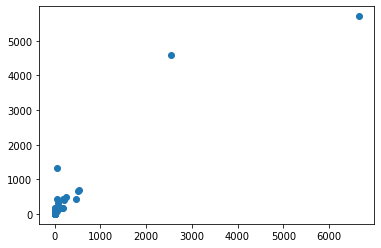

In [5]:
plt.scatter(df["Brain"],df["Body"])
plt.show()

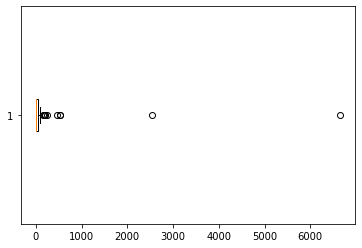

In [6]:
plt.boxplot(df["Brain"],vert=False)
plt.show()

In [7]:
q3 = df.Brain.quantile(0.75)
q1 = df.Brain.quantile(0.25)
iqr = q3-q1
ut = q3+(1.5*iqr)
lt = q1-(1.5*iqr)
print("BRAIN")
lt,ut

BRAIN


(-70.80375000000001, 119.60625)

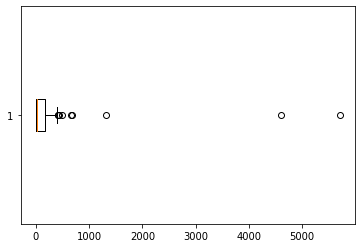

In [8]:
plt.boxplot(df["Body"],vert=False)
plt.show()

In [9]:
q3 = df.Body.quantile(0.75)
q1 = df.Body.quantile(0.25)
iqr = q3-q1
ut = q3+(1.5*iqr)
lt = q1-(1.5*iqr)
print("BODY")
lt,ut

BODY


(-238.375, 408.625)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Brain,62.0,198.789984,899.158011,0.005,0.60,3.3425,48.2025,6654.0
Body,62.0,283.134194,930.278942,0.140,4.25,17.2500,166.0000,5712.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [12]:
X = df["Brain"].values
y = df["Body"].values
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Slope(m): ",regressor.coef_)
print("Intercept(c): ",regressor.intercept_)

Slope(m):  [1.76864237]
Intercept(c):  44.83913579189482


In [15]:
print('R2- SCORE:',regressor.score(X_test,y_test))

R2- SCORE: -0.28317653496705697


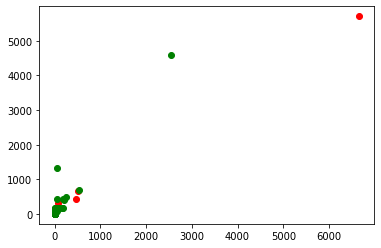

In [21]:
plt.scatter(X_test, y_test, color='Red')
plt.scatter(X_train, y_train, color='Green')
plt.show()

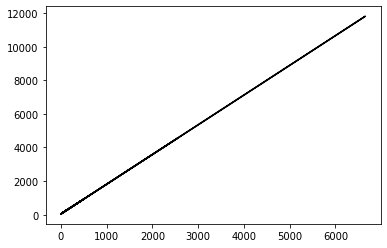

In [20]:
plt.plot(X,regressor.predict(X), color="Black")